# Problem Statement:
## "Predict the price of refrigerators on Flipkart based on various factors such as brand, type, capacity, features (e.g., energy rating, frost type), and customer ratings."

# Target Feature:

## Price of the refrigerator

In [3]:
import pandas as pd

In [4]:
# import the csv file
df = pd.read_csv('flipkart.csv')

In [5]:
df

,Brand,EnergyEfficiencyRating,DesignType,CoolingTechnology,Capacity(in Litres),CompressorType,Rating,ProductWarranty(in years),CompressorWarranty(in years),Price
0,SAMSUNG,3.0,Double Door,Frost Free,236,Digital Inverter,4.3,1.0,20.0,"₹26,490"
1,SAMSUNG,5.0,Single Door,Direct Cool,183,Digital Inverter,4.4,1.0,20.0,"₹17,190"
2,LG,5.0,Single Door,Direct Cool,185,Smart Inverter,4.5,1.0,10.0,"₹17,290"
3,SAMSUNG,4.0,Single Door,Direct Cool,183,Digital Inverter,4.4,1.0,20.0,"₹16,190"
4,LG,4.0,Single Door,Direct Cool,185,Smart Inverter,4.4,1.0,10.0,"₹15,990"
...,...,...,...,...,...,...,...,...,...,...
427,Whirlpool,3.0,Single Door,Direct Cool,207,Inverter,4.3,1.0,10.0,"₹17,560"
428,LG,5.0,Single Door,Direct Cool,201,Smart Inverter,4.4,1.0,10.0,"₹18,290"
429,Godrej,2.0,Double Door,Frost Free,253,Inverter,5.0,1.0,NaN,"₹24,200"
430,Haier,NaN,Side by Side,Frost Free,628,Inverter,4.6,1.0,10.0,"₹86,390"


In [6]:
## Reading CSV file
no_of_features = df.shape[1]
no_of_observations = df.shape[0]
data_types = df.dtypes
missing_values = df.isnull().sum()

In [7]:
no_of_features

10

In [8]:
no_of_observations

432

In [9]:
data_types

Brand                            object
EnergyEfficiencyRating          float64
DesignType                       object
CoolingTechnology                object
Capacity(in Litres)               int64
CompressorType                   object
Rating                          float64
ProductWarranty(in years)       float64
CompressorWarranty(in years)    float64
Price                            object
dtype: object

In [10]:
missing_values

Brand                            0
EnergyEfficiencyRating          22
DesignType                       2
CoolingTechnology                0
Capacity(in Litres)              0
CompressorType                  31
Rating                           0
ProductWarranty(in years)        3
CompressorWarranty(in years)     7
Price                            0
dtype: int64

In [11]:
print(f'Number of Features (Columns): {no_of_features}')
print(f'Number of Observations (Rows): {no_of_observations}')
print('\nData Types of Each Feature:\n', data_types)
print('\nMissing Values in Each Column:\n', missing_values)

Number of Features (Columns): 10
Number of Observations (Rows): 432

Data Types of Each Feature:
 Brand                            object
EnergyEfficiencyRating          float64
DesignType                       object
CoolingTechnology                object
Capacity(in Litres)               int64
CompressorType                   object
Rating                          float64
ProductWarranty(in years)       float64
CompressorWarranty(in years)    float64
Price                            object
dtype: object

Missing Values in Each Column:
 Brand                            0
EnergyEfficiencyRating          22
DesignType                       2
CoolingTechnology                0
Capacity(in Litres)              0
CompressorType                  31
Rating                           0
ProductWarranty(in years)        3
CompressorWarranty(in years)     7
Price                            0
dtype: int64


In [12]:
## cleaning the data

In [13]:
df["Brand"] = df["Brand"].replace("Blue","Blue Star")

In [14]:
##1. Remove special characters and convert Price to float

df['Price'] = df['Price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

In [15]:
df

,Brand,EnergyEfficiencyRating,DesignType,CoolingTechnology,Capacity(in Litres),CompressorType,Rating,ProductWarranty(in years),CompressorWarranty(in years),Price
0,SAMSUNG,3.0,Double Door,Frost Free,236,Digital Inverter,4.3,1.0,20.0,26490.0
1,SAMSUNG,5.0,Single Door,Direct Cool,183,Digital Inverter,4.4,1.0,20.0,17190.0
2,LG,5.0,Single Door,Direct Cool,185,Smart Inverter,4.5,1.0,10.0,17290.0
3,SAMSUNG,4.0,Single Door,Direct Cool,183,Digital Inverter,4.4,1.0,20.0,16190.0
4,LG,4.0,Single Door,Direct Cool,185,Smart Inverter,4.4,1.0,10.0,15990.0
...,...,...,...,...,...,...,...,...,...,...
427,Whirlpool,3.0,Single Door,Direct Cool,207,Inverter,4.3,1.0,10.0,17560.0
428,LG,5.0,Single Door,Direct Cool,201,Smart Inverter,4.4,1.0,10.0,18290.0
429,Godrej,2.0,Double Door,Frost Free,253,Inverter,5.0,1.0,NaN,24200.0
430,Haier,NaN,Side by Side,Frost Free,628,Inverter,4.6,1.0,10.0,86390.0


In [16]:

#2. Incorrect Headers, 
# Renaming columns for consistency
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [17]:
df

,Brand,EnergyEfficiencyRating,DesignType,CoolingTechnology,Capacityin_Litres,CompressorType,Rating,ProductWarrantyin_years,CompressorWarrantyin_years,Price
0,SAMSUNG,3.0,Double Door,Frost Free,236,Digital Inverter,4.3,1.0,20.0,26490.0
1,SAMSUNG,5.0,Single Door,Direct Cool,183,Digital Inverter,4.4,1.0,20.0,17190.0
2,LG,5.0,Single Door,Direct Cool,185,Smart Inverter,4.5,1.0,10.0,17290.0
3,SAMSUNG,4.0,Single Door,Direct Cool,183,Digital Inverter,4.4,1.0,20.0,16190.0
4,LG,4.0,Single Door,Direct Cool,185,Smart Inverter,4.4,1.0,10.0,15990.0
...,...,...,...,...,...,...,...,...,...,...
427,Whirlpool,3.0,Single Door,Direct Cool,207,Inverter,4.3,1.0,10.0,17560.0
428,LG,5.0,Single Door,Direct Cool,201,Smart Inverter,4.4,1.0,10.0,18290.0
429,Godrej,2.0,Double Door,Frost Free,253,Inverter,5.0,1.0,NaN,24200.0
430,Haier,NaN,Side by Side,Frost Free,628,Inverter,4.6,1.0,10.0,86390.0


In [18]:
#3.  Incorrect Format of the data (Invalid Values, Columns) 
# Check for invalid values in numeric columns
df['EnergyEfficiencyRating'] = pd.to_numeric(df['EnergyEfficiencyRating'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Capacityin_Litres'] = pd.to_numeric(df['Capacityin_Litres'], errors='coerce')
df['ProductWarrantyin_years'] = pd.to_numeric(df['ProductWarrantyin_years'], errors='coerce')
df['CompressorWarrantyin_years'] = pd.to_numeric(df['CompressorWarrantyin_years'], errors='coerce')


In [19]:
df

,Brand,EnergyEfficiencyRating,DesignType,CoolingTechnology,Capacityin_Litres,CompressorType,Rating,ProductWarrantyin_years,CompressorWarrantyin_years,Price
0,SAMSUNG,3.0,Double Door,Frost Free,236,Digital Inverter,4.3,1.0,20.0,26490.0
1,SAMSUNG,5.0,Single Door,Direct Cool,183,Digital Inverter,4.4,1.0,20.0,17190.0
2,LG,5.0,Single Door,Direct Cool,185,Smart Inverter,4.5,1.0,10.0,17290.0
3,SAMSUNG,4.0,Single Door,Direct Cool,183,Digital Inverter,4.4,1.0,20.0,16190.0
4,LG,4.0,Single Door,Direct Cool,185,Smart Inverter,4.4,1.0,10.0,15990.0
...,...,...,...,...,...,...,...,...,...,...
427,Whirlpool,3.0,Single Door,Direct Cool,207,Inverter,4.3,1.0,10.0,17560.0
428,LG,5.0,Single Door,Direct Cool,201,Smart Inverter,4.4,1.0,10.0,18290.0
429,Godrej,2.0,Double Door,Frost Free,253,Inverter,5.0,1.0,NaN,24200.0
430,Haier,NaN,Side by Side,Frost Free,628,Inverter,4.6,1.0,10.0,86390.0


In [20]:
missing_values

Brand                            0
EnergyEfficiencyRating          22
DesignType                       2
CoolingTechnology                0
Capacity(in Litres)              0
CompressorType                  31
Rating                           0
ProductWarranty(in years)        3
CompressorWarranty(in years)     7
Price                            0
dtype: int64

In [21]:
#5. Imputing the missing values,
# Fill missing values
df['EnergyEfficiencyRating'].fillna(df['EnergyEfficiencyRating'].mean(), inplace=True)
df['DesignType'].fillna(df['DesignType'].mode()[0], inplace=True)
df['CompressorType'].fillna(df['CompressorType'].mode()[0], inplace=True)
df['ProductWarrantyin_years'].fillna(df['ProductWarrantyin_years'].mean(), inplace=True)
df['CompressorWarrantyin_years'].fillna(df['CompressorWarrantyin_years'].mean(), inplace=True)


In [22]:
df

,Brand,EnergyEfficiencyRating,DesignType,CoolingTechnology,Capacityin_Litres,CompressorType,Rating,ProductWarrantyin_years,CompressorWarrantyin_years,Price
0,SAMSUNG,3.00000,Double Door,Frost Free,236,Digital Inverter,4.3,1.0,20.000000,26490.0
1,SAMSUNG,5.00000,Single Door,Direct Cool,183,Digital Inverter,4.4,1.0,20.000000,17190.0
2,LG,5.00000,Single Door,Direct Cool,185,Smart Inverter,4.5,1.0,10.000000,17290.0
3,SAMSUNG,4.00000,Single Door,Direct Cool,183,Digital Inverter,4.4,1.0,20.000000,16190.0
4,LG,4.00000,Single Door,Direct Cool,185,Smart Inverter,4.4,1.0,10.000000,15990.0
...,...,...,...,...,...,...,...,...,...,...
427,Whirlpool,3.00000,Single Door,Direct Cool,207,Inverter,4.3,1.0,10.000000,17560.0
428,LG,5.00000,Single Door,Direct Cool,201,Smart Inverter,4.4,1.0,10.000000,18290.0
429,Godrej,2.00000,Double Door,Frost Free,253,Inverter,5.0,1.0,11.171765,24200.0
430,Haier,3.34878,Side by Side,Frost Free,628,Inverter,4.6,1.0,10.000000,86390.0


In [23]:
df['EnergyEfficiencyRating'] = df['EnergyEfficiencyRating'].round(1)
df['ProductWarrantyin_years'] = df['ProductWarrantyin_years'].round(0)  # Assuming years should be whole numbers
df['CompressorWarrantyin_years'] = df['CompressorWarrantyin_years'].round(0)  # Assuming years should be whole numbers
df['Rating'] = df['Rating'].round(1)

In [24]:
df

,Brand,EnergyEfficiencyRating,DesignType,CoolingTechnology,Capacityin_Litres,CompressorType,Rating,ProductWarrantyin_years,CompressorWarrantyin_years,Price
0,SAMSUNG,3.0,Double Door,Frost Free,236,Digital Inverter,4.3,1.0,20.0,26490.0
1,SAMSUNG,5.0,Single Door,Direct Cool,183,Digital Inverter,4.4,1.0,20.0,17190.0
2,LG,5.0,Single Door,Direct Cool,185,Smart Inverter,4.5,1.0,10.0,17290.0
3,SAMSUNG,4.0,Single Door,Direct Cool,183,Digital Inverter,4.4,1.0,20.0,16190.0
4,LG,4.0,Single Door,Direct Cool,185,Smart Inverter,4.4,1.0,10.0,15990.0
...,...,...,...,...,...,...,...,...,...,...
427,Whirlpool,3.0,Single Door,Direct Cool,207,Inverter,4.3,1.0,10.0,17560.0
428,LG,5.0,Single Door,Direct Cool,201,Smart Inverter,4.4,1.0,10.0,18290.0
429,Godrej,2.0,Double Door,Frost Free,253,Inverter,5.0,1.0,11.0,24200.0
430,Haier,3.3,Side by Side,Frost Free,628,Inverter,4.6,1.0,10.0,86390.0


In [25]:
df.isnull().sum()

Brand                         0
EnergyEfficiencyRating        0
DesignType                    0
CoolingTechnology             0
Capacityin_Litres             0
CompressorType                0
Rating                        0
ProductWarrantyin_years       0
CompressorWarrantyin_years    0
Price                         0
dtype: int64

In [26]:
## 6.Identifying and treating the Outliers 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



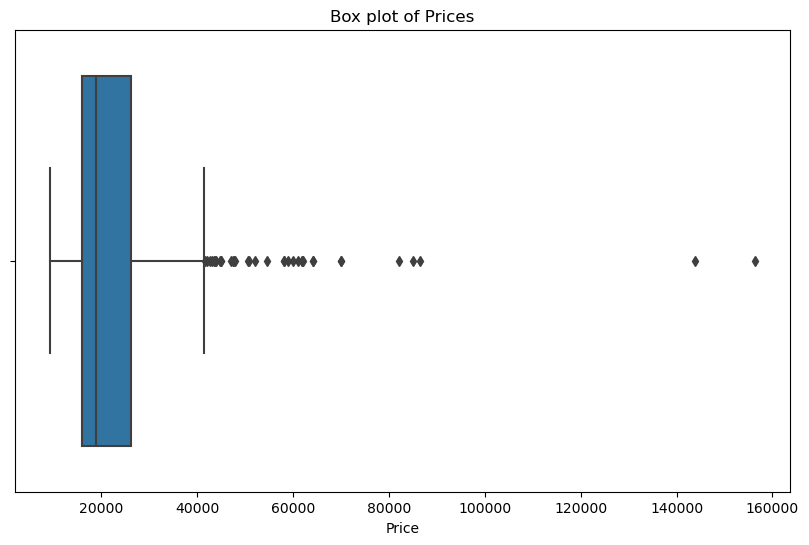

In [27]:
# Visualize potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Box plot of Prices')
plt.show()



In [28]:
# Identifying outliers using the IQR method
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1



In [29]:
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [30]:
# Treating outliers by capping
df['Price'] = np.where(df['Price'] < lower_bound, lower_bound, df['Price'])
df['Price'] = np.where(df['Price'] > upper_bound, upper_bound, df['Price'])


<Axes: >

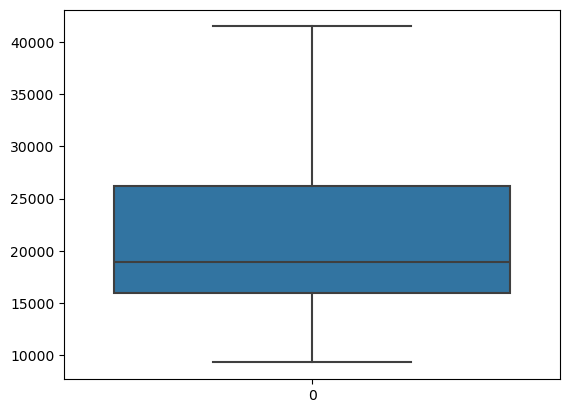

In [31]:

sns.boxplot(df["Price"])

In [32]:
df["Price"] = df["Price"].round(0)

In [33]:
df

,Brand,EnergyEfficiencyRating,DesignType,CoolingTechnology,Capacityin_Litres,CompressorType,Rating,ProductWarrantyin_years,CompressorWarrantyin_years,Price
0,SAMSUNG,3.0,Double Door,Frost Free,236,Digital Inverter,4.3,1.0,20.0,26490.0
1,SAMSUNG,5.0,Single Door,Direct Cool,183,Digital Inverter,4.4,1.0,20.0,17190.0
2,LG,5.0,Single Door,Direct Cool,185,Smart Inverter,4.5,1.0,10.0,17290.0
3,SAMSUNG,4.0,Single Door,Direct Cool,183,Digital Inverter,4.4,1.0,20.0,16190.0
4,LG,4.0,Single Door,Direct Cool,185,Smart Inverter,4.4,1.0,10.0,15990.0
...,...,...,...,...,...,...,...,...,...,...
427,Whirlpool,3.0,Single Door,Direct Cool,207,Inverter,4.3,1.0,10.0,17560.0
428,LG,5.0,Single Door,Direct Cool,201,Smart Inverter,4.4,1.0,10.0,18290.0
429,Godrej,2.0,Double Door,Frost Free,253,Inverter,5.0,1.0,11.0,24200.0
430,Haier,3.3,Side by Side,Frost Free,628,Inverter,4.6,1.0,10.0,41506.0


In [34]:
##  Data Analysis and Visualization (EDA)

# Univariate Analysis


In [35]:
# Continuous Variables

## For continuous variables like Price, Energy Efficiency Rating, and Rating, 
## we will calculate central tendency (mean, median) and measures of dispersion (standard deviation, variance).

# Summary statistics for continuous variables
summary = df[['Price', 'EnergyEfficiencyRating', 'Rating']].describe()
print(summary)


             Price  EnergyEfficiencyRating      Rating
count    432.00000              432.000000  432.000000
mean   22329.74537                3.346296    4.289815
std     8504.29778                1.155210    0.215712
min     9279.00000                1.000000    3.300000
25%    15990.00000                2.000000    4.200000
50%    18940.00000                3.000000    4.300000
75%    26196.25000                4.000000    4.400000
max    41506.00000                5.000000    5.000000


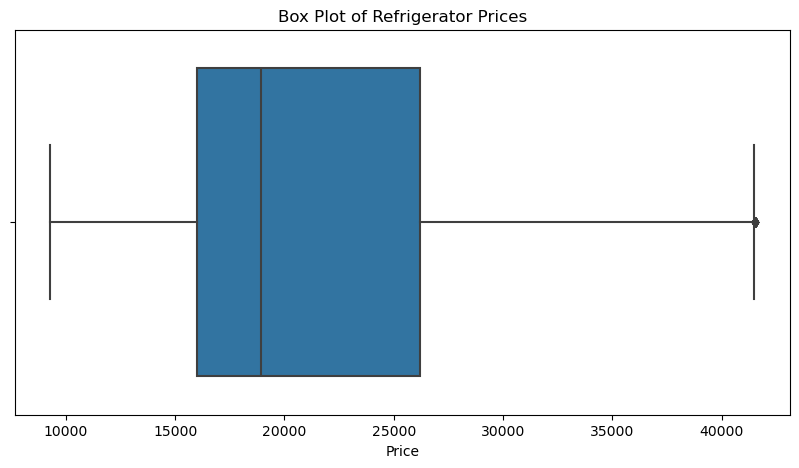

In [36]:
#Visualizations
## Box Plot: To visualize the spread and detect outliers.
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Refrigerator Prices')
plt.show()

C:\Users\abhir\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


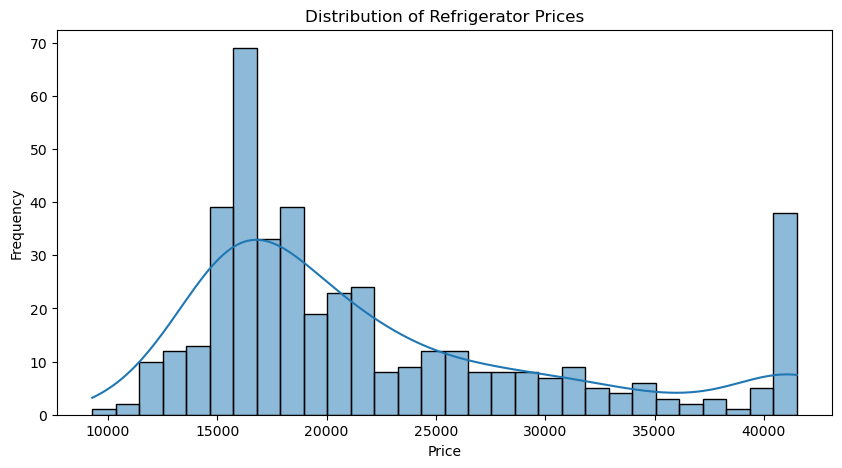

In [37]:
## Histogram/Distribution Plot: To visualize the distribution.
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Refrigerator Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [38]:
#Categorical Variables
## For categorical variables like Brand, Design Type, and Compressor Type, calculate the frequency distribution.

# Frequency distribution for Brand
brand_counts = df['Brand'].value_counts()
print(brand_counts)


Brand
Whirlpool    197
SAMSUNG       79
Haier         55
Godrej        53
LG            47
Blue Star      1
Name: count, dtype: int64


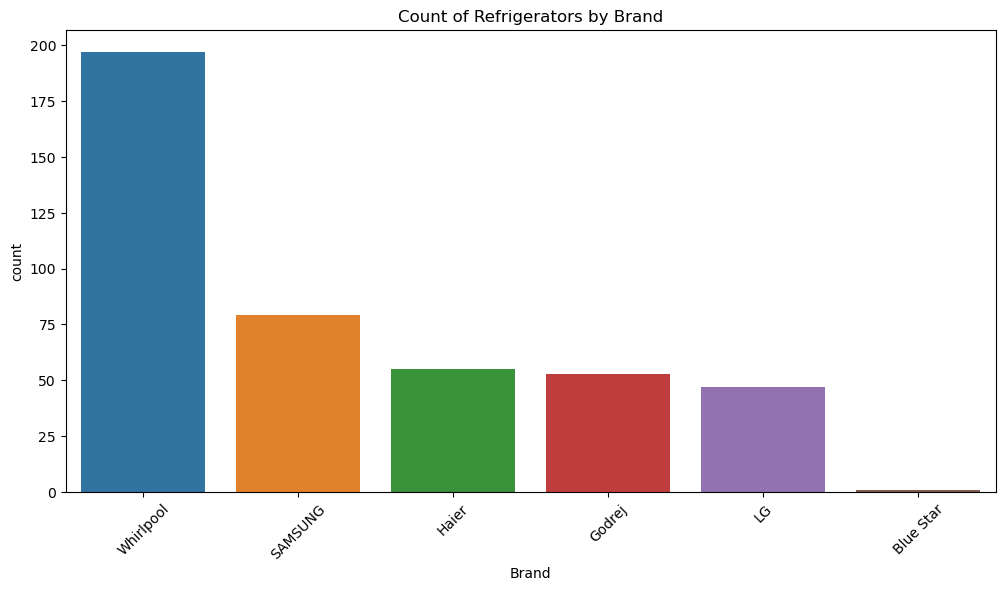

In [39]:
#Visualizations
##Count Plot: To visualize frequency distribution of categorical variables.
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Brand', order=df['Brand'].value_counts().index)
plt.title('Count of Refrigerators by Brand')
plt.xticks(rotation=45)
plt.show()


In [40]:
# BIVARIATE AND MULTIVARIATE ANALYSIS

In [41]:
# Continuous and Categorical Variables
## Use groupby or pivot tables to analyze relationships between a continuous variable and a categorical variable.

In [42]:
# Grouping Price by Brand
price_by_brand = df.groupby('Brand')['Price'].mean().sort_values()
print(price_by_brand)

# Pivot Table Example
pivot_table = df.pivot_table(values='Price', index='Brand', aggfunc='mean')
print(pivot_table)


Brand
Blue Star     9279.000000
Whirlpool    20144.329949
Godrej       21549.018868
Haier        23336.127273
LG           25509.425532
SAMSUNG      25876.075949
Name: Price, dtype: float64
                  Price
Brand                  
Blue Star   9279.000000
Godrej     21549.018868
Haier      23336.127273
LG         25509.425532
SAMSUNG    25876.075949
Whirlpool  20144.329949


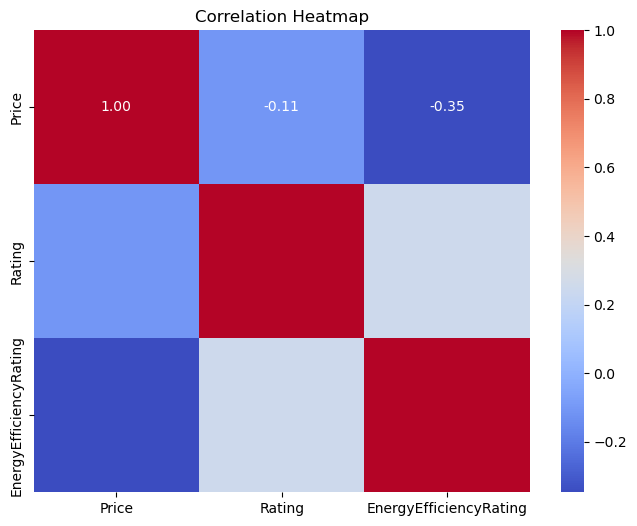

In [43]:
# Continuous to Continuous Variables
## Analyze the correlation between continuous variables using a correlation plot.

# Correlation Matrix
correlation_matrix = df[['Price', 'Rating', 'EnergyEfficiencyRating']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


DesignType  Double Door  Side by Side  Single Door  Triple Door
Brand                                                          
Blue Star             0             0            1            0
Godrej               26             1           26            0
Haier                17             5           33            0
LG                   20             3           24            0
SAMSUNG              38             1           40            0
Whirlpool            29             0          159            9


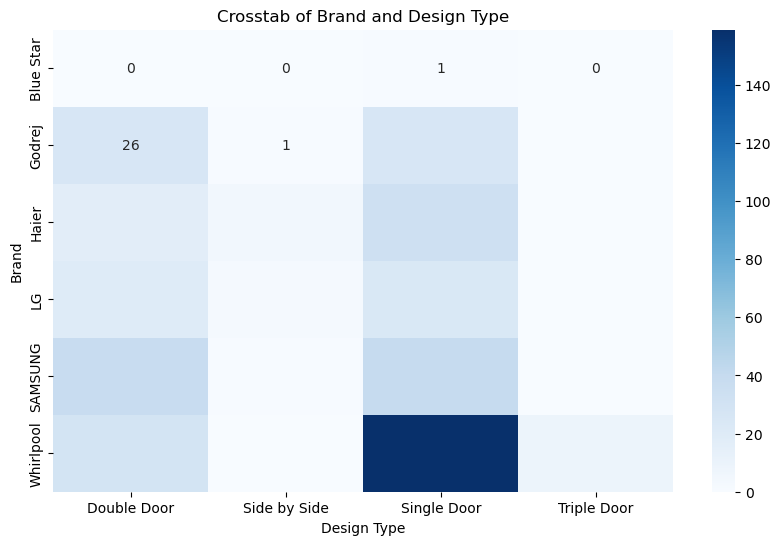

In [44]:
# Categorical to Categorical Variables
## Use crosstab to analyze relationships between two categorical variables.

# Crosstab between Brand and Design Type
crosstab = pd.crosstab(df['Brand'], df['DesignType'])
print(crosstab)

# Visualize the crosstab
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Crosstab of Brand and Design Type')
plt.ylabel('Brand')
plt.xlabel('Design Type')
plt.show()


# Interpretations and Insights from EDA:
## Based on the Exploratory Data Analysis (EDA), here are the key interpretations and insights drawn from the dataset, particularly focusing on the relationship between Ratings and Price (or Gross Income) along with the other features:

### Distribution of Key Variables:
Price:
The distribution of the Price variable likely shows that most refrigerators are concentrated in a specific price range, with some skewness towards higher-end models. This indicates that the majority of refrigerators are priced in a mid-range or budget-friendly segment, while a few premium brands or models push the average price higher.

Insight: This suggests that Price plays a significant role in determining the energy efficiency, brand, and possibly capacity of refrigerators. Budget refrigerators tend to have lower ratings or less advanced features, while higher-priced refrigerators might come with better energy efficiency, design, and cooling technology.

Rating:
The Rating distribution for refrigerators could be positively skewed, with many products receiving high ratings. This is common in online retail, where customers tend to leave positive reviews for products they are satisfied with.

Insight: Higher ratings tend to be associated with certain features like Brand, DesignType, and EnergyEfficiencyRating. Customers may rate premium brands or energy-efficient refrigerators more highly, reflecting their perceived value.



## Key Insights and Conclusions:
### 1.Continuous Variables:

Price and Rating distributions provide insights into the most common price ranges and how customer satisfaction (ratings) is distributed. The Price distribution might be skewed, indicating that most products are in a particular price range (e.g., budget vs. premium).

Rating might show a normal distribution or have a concentration of higher ratings (as reviews tend to be positively skewed).
Energy Efficiency and Capacity might exhibit distinct groupings, which could suggest correlations with price or brand.

### 2.Categorical Variables:

Certain DesignTypes (e.g., Single Door vs Double Door) might have a strong influence on Price and Rating.
The CompressorType (Inverter vs Non-Inverter) could correlate with higher Price and better EnergyEfficiencyRating.
Brand could also play a significant role in setting product price, with more well-known brands having higher prices.

### 3.Bi-variate/Multivariate Analysis:

The pivot table and groupby methods help us understand the impact of different categories (e.g., DesignType, CompressorType) on Price and Rating.
The correlation heatmap reveals how strongly continuous variables like Price, Rating, and EnergyEfficiencyRating are related to each other.
Crosstab analysis shows the distribution of categories and how certain DesignType and CompressorType combinations might lead to specific Price ranges or Rating levels.

## Conclusion:
## Through Exploratory Data Analysis (EDA), you can:

From the EDA, we can draw the following conclusions about the fridge market:

Price is a significant determinant of Rating, with higher-priced refrigerators typically receiving higher ratings. However, factors such as Energy Efficiency, Brand, DesignType, and CompressorType also influence customer satisfaction.

There is a strong correlation between Price and features like Capacity and EnergyEfficiencyRating. Larger, more feature-rich refrigerators with advanced technologies (e.g., inverter compressors, better cooling systems) tend to be more expensive.

Brand plays a crucial role in determining Price, and premium brands are often associated with higher ratings and better features. However, this does not guarantee a high rating, as other features like design and energy efficiency also matter.

Inverter compressors are a key selling point for higher-rated refrigerators, as they contribute to both better performance and higher energy efficiency.

DesignType significantly influences Price, with larger and more advanced designs (e.g., Double Door, Side-by-Side) commanding higher prices.

-------------------------------------------------------------------------------------------------------------------------------------------------------
In summary, a customer’s choice of refrigerator is influenced by a combination of price, brand, design, energy efficiency, and cooling technology. These factors collectively contribute to customer satisfaction (ratings) and can be used to predict product demand and pricing strategies in the market. Manufacturers aiming to optimize customer satisfaction should focus on delivering a balance of energy efficiency, advanced features, and design at competitive price points.


## Plots we can be drawn based on the data features/columns: 
## [Box-plot, Bar-plot, count plot, pie chart, scatter-plot, violin-plot,  
## distribution-plot, heat map, histogram and kde-plot etc., Use all plots for  individual variables] 


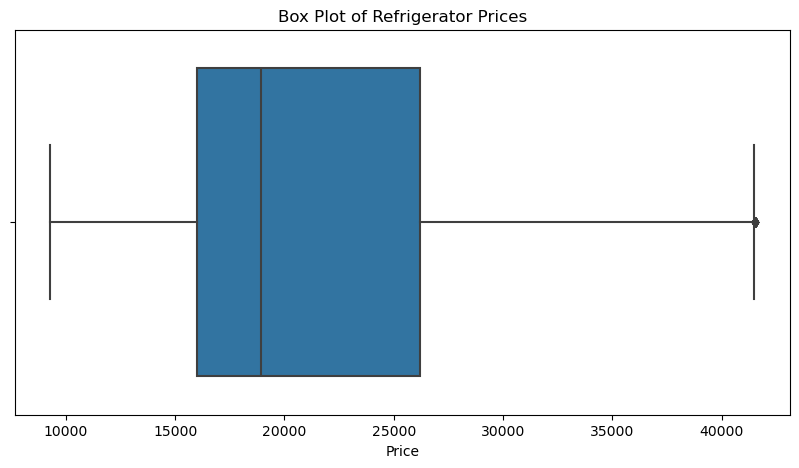

In [52]:
## A. Box Plot
## Used to show the distribution of a continuous variable and identify outliers.
# Box Plot for Price
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Refrigerator Prices')
plt.show()


C:\Users\abhir\AppData\Local\Temp\ipykernel_12168\2709580087.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Brand', y='Price', data=df, estimator=np.mean, ci=None)


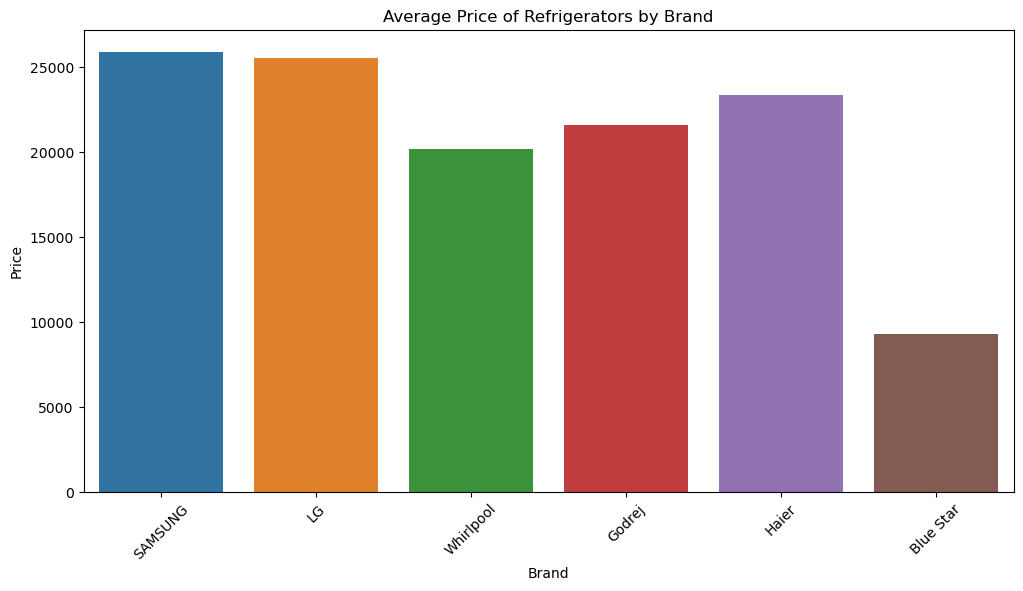

In [53]:
# B. Bar Plot
## Useful for comparing the mean of a continuous variable across categories.

# Bar Plot for average Price by Brand
plt.figure(figsize=(12, 6))
sns.barplot(x='Brand', y='Price', data=df, estimator=np.mean, ci=None)
plt.title('Average Price of Refrigerators by Brand')
plt.xticks(rotation=45)
plt.show()


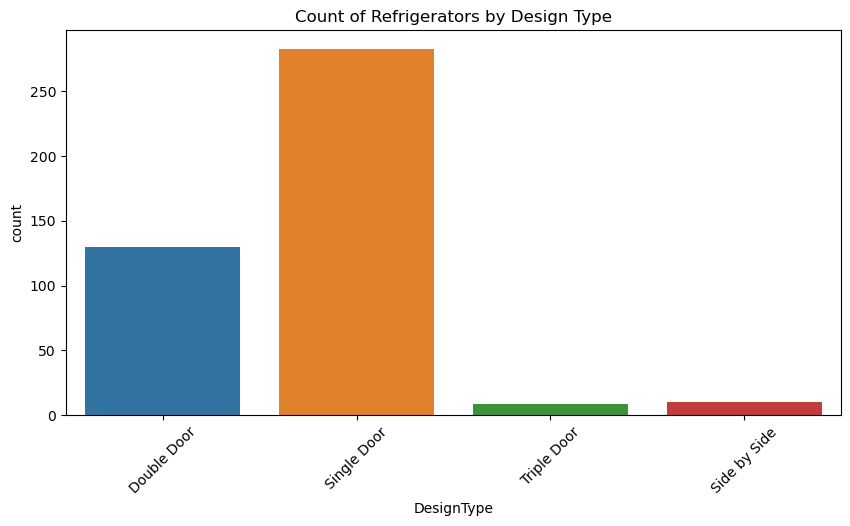

In [47]:
# C. Count Plot
## Displays the count of observations in each categorical bin.

# Count Plot for Design Type
plt.figure(figsize=(10, 5))
sns.countplot(x='DesignType', data=df)
plt.title('Count of Refrigerators by Design Type')
plt.xticks(rotation=45)
plt.show()


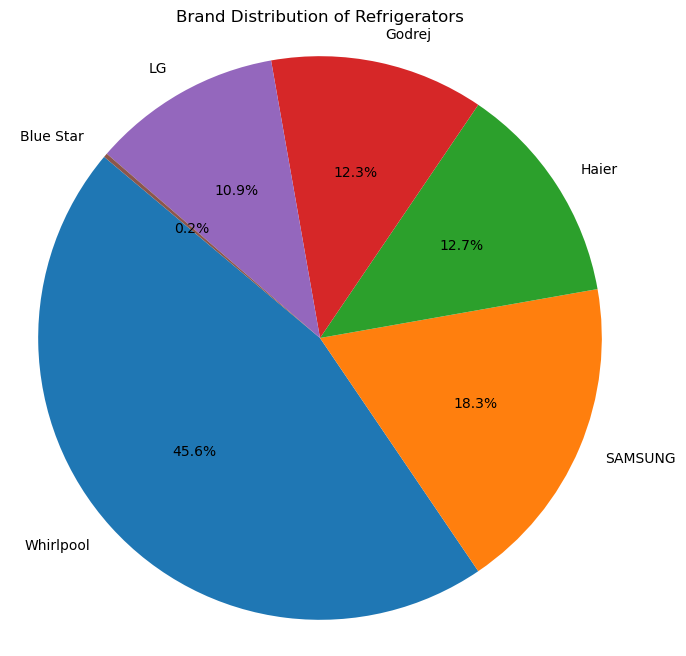

In [48]:
# D. Pie Chart
## Shows the proportion of categories in a dataset.

# Pie Chart for Brand distribution
brand_counts = df['Brand'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Brand Distribution of Refrigerators')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


C:\Users\abhir\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


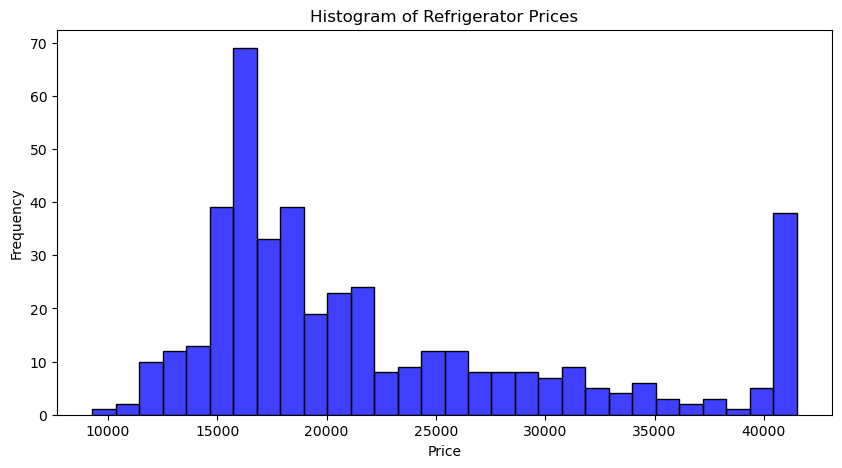

In [49]:
#  Histogram
## Shows the frequency distribution of a single continuous variable.

# Histogram for Price
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, color='blue', kde=False)
plt.title('Histogram of Refrigerator Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
